# Chapter 3 - Deep Learning Development with PyTorch 

In [8]:
import torch
import torchvision

## Data Loading

In [9]:
from torchvision.datasets import CIFAR10

train_data = CIFAR10(root="./train/",
                    train=True, 
                    download=True)

Files already downloaded and verified


6


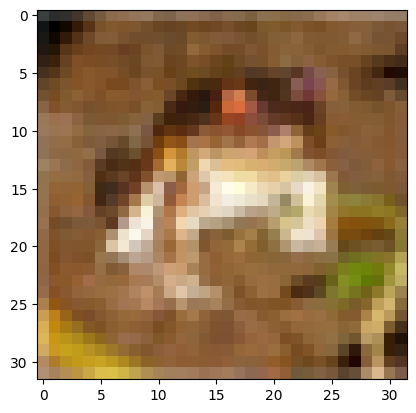

In [10]:
# Accessing the Data
import matplotlib.pyplot as plt
plt.imshow(train_data[0][0])

#Accessing the label
print(train_data[0][1])



In [11]:
test_data = CIFAR10(root="./test/", 
                    train=False, 
                    download=True)


print(len(test_data))

print(test_data.data.shape) 

Files already downloaded and verified
10000
(10000, 32, 32, 3)


## Data Transforms

In [12]:
from torchvision import transforms

train_transforms = transforms.Compose([
  transforms.RandomCrop(32, padding=4),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(
      (0.4914, 0.4822, 0.4465),
      (0.2023, 0.1994, 0.2010))])

train_data_transforms = CIFAR10(root="./train/",
                    train=True, 
                    download=True,
                    transform=train_transforms)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x12FB146BDC0>
<class 'torch.Tensor'>
torch.Size([3, 32, 32])
tensor([[[-2.4291, -2.4291, -2.4291,  ..., -0.0835, -0.0253,  0.0328],
         [-2.4291, -2.4291, -2.4291,  ...,  0.1104,  0.2073,  0.0716],
         [-2.4291, -2.4291, -2.4291,  ...,  0.1297,  0.2073,  0.0910],
         ...,
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291]],

        [[-2.4183, -2.4183, -2.4183,  ..., -0.9039, -0.9039, -0.8646],
         [-2.4183, -2.4183, -2.4183,  ..., -0.7662, -0.6876, -0.8056],
         [-2.4183, -2.4183, -2.4183,  ..., -0.7859, -0.6876, -0.7662],
         ...,
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.

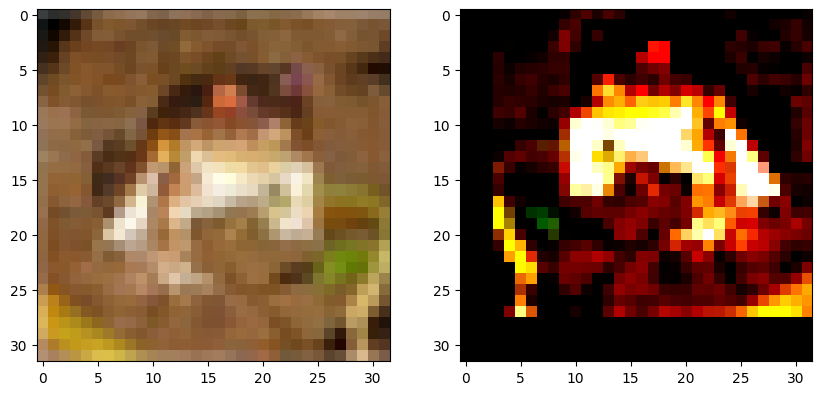

In [13]:
data,label = train_data[0]
print(type(data))
print(data)



data_transforms,label_transforms = train_data_transforms[0]
print(type(data_transforms))
print(data_transforms.size())
print(data_transforms)


fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.imshow(data)
fig.add_subplot(1,2,2)
plt.imshow(data_transforms.permute(1, 2, 0))

In [14]:
test_transforms = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(
      (0.4914, 0.4822, 0.4465),
      (0.2023, 0.1994, 0.2010))])

test_data_transforms = torchvision.datasets.CIFAR10(
      root="./test/", 
      train=False, 
      transform=test_transforms)

print(test_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test


## Data Batching

In [15]:
trainloader = torch.utils.data.DataLoader(
                    train_data_transforms, 
                    batch_size=16, 
                    shuffle=True)

In [16]:
testloader = torch.utils.data.DataLoader(
                    test_data_transforms, 
                    batch_size=16, 
                    shuffle=False)

## Model Design



### Using Existing & Pre-trained models

In [17]:
from torchvision import models

vgg16 = models.vgg16(pretrained=True)

c:\Users\kaasa\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kaasa\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
print(vgg16.features)

print(vgg16.avgpool)

print(vgg16.classifier)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [19]:
import torch.nn as nn
vgg16.classifier[-1] = nn.Linear(4096,10)

print(vgg16.classifier)

device = "cuda" if torch.cuda.is_available() else "cpu"

vgg_model = vgg16.to(device = device)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


## The PyTorch NN Module (torch.nn)

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2048, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64,2)

    def forward(self, x):
        x = x.view(-1, 2048)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        return x

In [21]:
simplenet = SimpleNet()
print(simplenet)

input = torch.rand(2048)
output = simplenet(input)

SimpleNet(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


## Training

In [22]:
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # <1>
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
LeNet_model = LeNet5().to(device=device)

### Fundamental Training Loop

Code Annotations:

<1> Our training loop

<2> Need to move inputs and labels to GPU is avail.

<3> Zero out gradients before each backprop or they'll accumulate

<4> Forward pass

<5> Compute loss

<6> Backpropagation, compute gradients

<7> Adjust parameters based on gradients

<8> accumulate batch loss so we can average over epoch


In [23]:
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_model.parameters(), # <1>
                      lr=0.001, 
                      momentum=0.9)

In [24]:
N_EPOCHS = 10 
for epoch in range(N_EPOCHS): # <1>

    epoch_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.to(device) # <2>
        labels = labels.to(device)

        optimizer.zero_grad() # <3>

        outputs = vgg_model(inputs) # <4>
        loss = criterion(outputs, labels) # <5>
        loss.backward() # <6>
        optimizer.step() # <7>

        epoch_loss += loss.item() # <8>
    print("Epoch: {} Loss: {}".format(epoch, 
                  epoch_loss/len(trainloader)))



Epoch: 0 Loss: 0.8040304252076149
Epoch: 1 Loss: 0.5063973597955703
Epoch: 2 Loss: 0.4178770705598593
Epoch: 3 Loss: 0.3528153747934103
Epoch: 4 Loss: 0.3147062732028961
Epoch: 5 Loss: 0.27561889982227233
Epoch: 6 Loss: 0.2505663666405529
Epoch: 7 Loss: 0.23006789725095034
Epoch: 8 Loss: 0.20766227719657124
Epoch: 9 Loss: 0.1943484009117633


In [25]:
num_correct = 0.0

for x_test_batch, y_test_batch in testloader:

    vgg_model.eval()

    y_test_batch = y_test_batch.to(device)

    x_test_batch = x_test_batch.to(device)

    y_pred_batch = vgg_model(x_test_batch)

    _, predicted = torch.max(y_pred_batch, 1)

    num_correct += (predicted == y_test_batch).float().sum()

 

accuracy = num_correct/(len(testloader)*testloader.batch_size)


print(len(testloader), testloader.batch_size)

print("Test Accuracy: {}".format(accuracy))

625 16
Test Accuracy: 0.8848999738693237


In [26]:
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # <1>
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
LeNet_model = LeNet5().to(device=device)

In [27]:
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(LeNet_model.parameters(), # <1>
                      lr=0.001, 
                      momentum=0.9)

In [28]:
N_EPOCHS = 10 
for epoch in range(N_EPOCHS): # <1>

    epoch_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.to(device) # <2>
        labels = labels.to(device)

        optimizer.zero_grad() # <3>

        outputs = LeNet_model(inputs) # <4>
        loss = criterion(outputs, labels) # <5>
        loss.backward() # <6>
        optimizer.step() # <7>

        epoch_loss += loss.item() # <8>
    print("Epoch: {} Loss: {}".format(epoch, 
                  epoch_loss/len(trainloader)))



Epoch: 0 Loss: 1.9342037672805785
Epoch: 1 Loss: 1.628335000705719
Epoch: 2 Loss: 1.5182254874420167
Epoch: 3 Loss: 1.4341897128868104
Epoch: 4 Loss: 1.3742678700065614
Epoch: 5 Loss: 1.3288809646224975
Epoch: 6 Loss: 1.281578906364441
Epoch: 7 Loss: 1.2533338075447082
Epoch: 8 Loss: 1.2301560887908936
Epoch: 9 Loss: 1.200559967842102


In [29]:
num_correct = 0.0

for x_test_batch, y_test_batch in testloader:

    LeNet_model.eval()

    y_test_batch = y_test_batch.to(device)

    x_test_batch = x_test_batch.to(device)

    y_pred_batch = LeNet_model(x_test_batch)

    _, predicted = torch.max(y_pred_batch, 1)

    num_correct += (predicted == y_test_batch).float().sum()

 

accuracy = num_correct/(len(testloader)*testloader.batch_size)



print(len(testloader), testloader.batch_size)

print("Test Accuracy: {}".format(accuracy))

625 16
Test Accuracy: 0.6011999845504761


In [30]:
print(LeNet_model)
print(vgg_model)

LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1